In [8]:
!pip install pandas scikit-learn matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("D:\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
C:\Users\HP\AppData\Local\Temp\ipykernel_22292\2959235372.py:1: SyntaxWarning: invalid escape sequence '\W'
  df = pd.read_csv("D:\WA_Fn-UseC_-HR-Employee-Attrition.csv")


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [11]:
df = df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)

# Convert target to binary
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)

df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,False,False,False,False,False,True,False,False,True,True
1,49,0,279,8,1,3,61,2,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,4,92,2,1,3,...,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,4,56,3,1,3,...,False,False,False,False,True,False,False,True,False,True
4,27,0,591,2,1,1,40,3,1,2,...,True,False,False,False,False,False,False,True,False,False


In [12]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



In [15]:
probs = model.predict_proba(X_test)[:, 1]  # Get probability of class = 1 (churn)
results = X_test.copy()
results['churn_prob'] = probs
results['true_label'] = y_test.values
results = results.reset_index(drop=True)
results.head()


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,churn_prob,true_label
0,28,866,5,3,4,84,3,2,1,8463,...,False,False,False,True,False,False,True,False,0.14,0
1,53,1084,13,2,4,57,4,2,1,4450,...,True,False,False,False,False,False,False,False,0.06,0
2,24,240,22,1,4,58,1,1,3,1555,...,False,False,False,False,False,True,False,False,0.38,1
3,45,1339,7,3,2,59,3,3,1,9724,...,False,False,True,False,False,False,False,False,0.05,0
4,36,1396,5,2,4,62,3,2,2,5914,...,False,False,False,False,False,False,True,False,0.06,0


In [16]:
def interpret_risk(prob):
    if prob > 0.75:
        return 'High Risk'
    elif prob > 0.5:
        return 'Medium Risk'
    else:
        return 'Low Risk'

def recommend_action(risk_level):
    if risk_level == 'High Risk':
        return 'Assign mentor and reduce workload'
    elif risk_level == 'Medium Risk':
        return 'Schedule 1:1 check-in'
    else:
        return 'No action needed'

def notify_manager(index, risk, action):
    print(f"[NOTIFY] Employee {index} is at {risk}. Action: {action}")

# Apply the agent logic
results['risk_level'] = results['churn_prob'].apply(interpret_risk)
results['action'] = results['risk_level'].apply(recommend_action)

# Notify HR for high or medium risks
for index, row in results.iterrows():
    if row['risk_level'] != 'Low Risk':
        notify_manager(index, row['risk_level'], row['action'])


[NOTIFY] Employee 44 is at Medium Risk. Action: Schedule 1:1 check-in
[NOTIFY] Employee 46 is at Medium Risk. Action: Schedule 1:1 check-in
[NOTIFY] Employee 49 is at Medium Risk. Action: Schedule 1:1 check-in
[NOTIFY] Employee 61 is at Medium Risk. Action: Schedule 1:1 check-in
[NOTIFY] Employee 114 is at Medium Risk. Action: Schedule 1:1 check-in


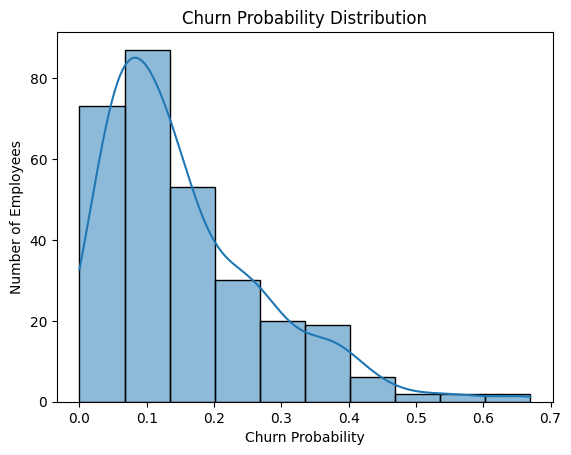

In [17]:
sns.histplot(results['churn_prob'], bins=10, kde=True)
plt.title("Churn Probability Distribution")
plt.xlabel("Churn Probability")
plt.ylabel("Number of Employees")
plt.show()


In [18]:
results[['churn_prob', 'risk_level', 'action']].head(30)


,churn_prob,risk_level,action
0,0.14,Low Risk,No action needed
1,0.06,Low Risk,No action needed
2,0.38,Low Risk,No action needed
3,0.05,Low Risk,No action needed
4,0.06,Low Risk,No action needed
5,0.39,Low Risk,No action needed
6,0.13,Low Risk,No action needed
7,0.11,Low Risk,No action needed
8,0.21,Low Risk,No action needed
9,0.27,Low Risk,No action needed


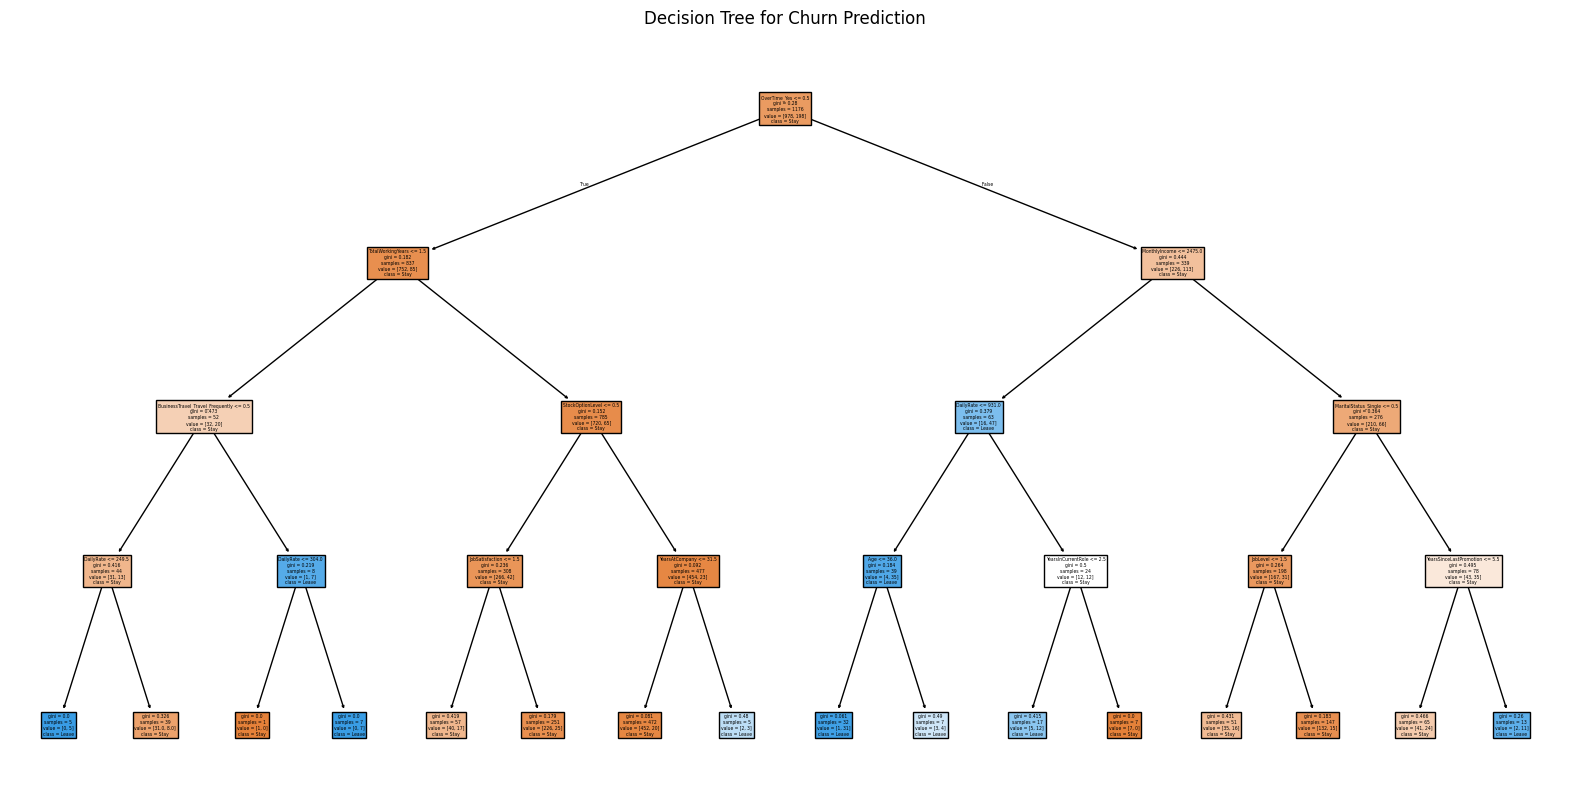

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train decision tree
dtree = DecisionTreeClassifier(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)

# Visualize decision tree
plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=X.columns, class_names=["Stay", "Leave"], filled=True)
plt.title("Decision Tree for Churn Prediction")
plt.show()


In [20]:
def recommend_action(risk_level):
    if risk_level == 'High Risk':
        return 'Assign mentor and reduce workload'
    elif risk_level == 'Medium Risk':
        return 'Schedule 1:1 HR check-in'
    else:
        return 'No action needed'


In [21]:
EMAIL_SENDER = "Raghav21csu378@ncuindia.edu"
EMAIL_PASSWORD = "vxvk irab meun qhrq"
EMAIL_RECEIVER = "chinuvats123@gmail.com" 

In [22]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

def send_email(subject, body, receiver=EMAIL_RECEIVER):
    msg = MIMEMultipart()
    msg['From'] = EMAIL_SENDER
    msg['To'] = receiver
    msg['Subject'] = subject
    
    msg.attach(MIMEText(body, 'plain'))

    try:
        server = smtplib.SMTP('smtp.gmail.com', 587)
        server.starttls()
        server.login(EMAIL_SENDER, EMAIL_PASSWORD)
        server.send_message(msg)
        server.quit()
        print(f"Email sent to {receiver}")
    except Exception as e:
        print(f"Failed to send email: {e}")


In [23]:
for index, row in results.iterrows():
    if row['risk_level'] != 'Low Risk':
        subject = f"[Churn Risk Alert] Employee {index} - {row['risk_level']}"
        body = f"""
        Employee {index} is at {row['risk_level']} of attrition.
        Churn probability: {row['churn_prob']:.2f}
        Recommended Action: {row['action']}
        """
        send_email(subject, body)


Email sent to chinuvats123@gmail.com
Email sent to chinuvats123@gmail.com
Email sent to chinuvats123@gmail.com
Email sent to chinuvats123@gmail.com
Email sent to chinuvats123@gmail.com
